In [1]:
#First import all the libraries we will be using for analysis:
import numpy as np
import pandas as pd
import scipy.stats as stats
from pathlib import Path
from pandas.api.types import CategoricalDtype
#and for plotting graphs:
import matplotlib.pyplot as plt
import seaborn as sns
#and set up the figure parameters
plt.rcParams['figure.figsize'] = [12, 7]
sns.set()
sns.set_style("whitegrid")
sns.set_palette("bright")

In [2]:
# Import the database into a dataframe
data_file =('PERFECT-Diss-Data.xlsx')
df_Gender_Climate = pd.read_excel(data_file, index_col=0)

In [3]:
df_Gender_Climate.head()

,Income group WB,Region 5,GGIE 2020,GGIEA 2020,GGIH 2020,GGIP 2020,GGI 2020,WPS 2019,GII 2019,GII 2018,...,CCH EPI 2020,GHP EPI 2020,EPI.change,GIB.change,CCH.change,GHP.change,EPI 2010,GIB EPI 2010,CCH EPI 2010,GHP EPI 2010
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Low income,ASIA,999.000,999.000,999.000,999.000,999.000,0.373,0.655,0.575,...,22.2,100.0,5.0,-1.5,7.3,0.0,20.5,52.1,14.9,100.0
Albania,Upper middle income,OECD,0.743,0.999,0.958,0.376,0.769,0.759,0.181,0.234,...,56.8,58.3,10.2,-48.0,14.7,-6.0,38.8,84.4,42.1,64.3
Algeria,Lower middle income,MAF,0.461,0.966,0.962,0.145,0.634,0.611,0.429,0.443,...,52.5,44.6,0.5,-2.8,-5.9,0.6,44.3,43.8,58.4,44.0
Angola,Lower middle income,MAF,0.640,0.759,0.980,0.262,0.660,0.626,0.536,0.578,...,49.0,60.3,5.3,-43.4,22.4,7.9,24.4,97.3,26.6,52.4
Antigua and Barbuda,High income,LAM,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,...,58.5,35.2,3.3,-11.4,12.4,-0.3,45.2,33.4,46.1,35.5


In [4]:
#Look for normality but first clean 999 with nans

df_Gender_Climate['GGI 2020'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Gender_Climate['WPS 2019'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Gender_Climate['EPI 2020'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Gender_Climate['GII 2018'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Gender_Climate['CCH EPI 2020'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Gender_Climate['GHP EPI 2020'].replace(to_replace=[999], value=np.nan, inplace=True)

#Look GGI normality 
display(stats.normaltest(df_Gender_Climate['GGI 2020'], nan_policy = 'omit'))
display(stats.shapiro(df_Gender_Climate['GGI 2020'],))
display(stats.anderson(df_Gender_Climate['GGI 2020'],))

#Look WPS normality
display(stats.normaltest(df_Gender_Climate['WPS 2019'], nan_policy = 'omit'))
display(stats.shapiro(df_Gender_Climate['WPS 2019'],))
display(stats.anderson(df_Gender_Climate['WPS 2019'],))

#Look GII normality
display(stats.normaltest(df_Gender_Climate['GII 2018'], nan_policy = 'omit'))
display(stats.shapiro(df_Gender_Climate['GII 2018'],))
display(stats.anderson(df_Gender_Climate['GII 2018'],))

#Look EPI normality
display(stats.normaltest(df_Gender_Climate['EPI 2020'], nan_policy = 'omit'))
display(stats.shapiro(df_Gender_Climate['EPI 2020'],))
display(stats.anderson(df_Gender_Climate['EPI 2020'],))

#Look CCH EPI 2020 normality (CCH = climate change)
display(stats.normaltest(df_Gender_Climate['CCH EPI 2020'], nan_policy = 'omit'))
display(stats.shapiro(df_Gender_Climate['CCH EPI 2020'],))
display(stats.anderson(df_Gender_Climate['CCH EPI 2020'],))

#Look GHP EPI 2020 normality (GHP = GHG emissions per capita)
display(stats.normaltest(df_Gender_Climate['GHP EPI 2020'], nan_policy = 'omit'))
display(stats.shapiro(df_Gender_Climate['GHP EPI 2020'],))
display(stats.anderson(df_Gender_Climate['GHP EPI 2020'],))

NormaltestResult(statistic=4.131984239285306, pvalue=0.1266925340439489)

ShapiroResult(statistic=nan, pvalue=1.0)

AndersonResult(statistic=nan, critical_values=array([0.564, 0.643, 0.771, 0.899, 1.07 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

NormaltestResult(statistic=8.556193311863332, pvalue=0.013869034525202505)

ShapiroResult(statistic=nan, pvalue=1.0)

AndersonResult(statistic=nan, critical_values=array([0.564, 0.643, 0.771, 0.899, 1.07 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

NormaltestResult(statistic=27.99972111648771, pvalue=8.316446770129438e-07)

ShapiroResult(statistic=nan, pvalue=1.0)

AndersonResult(statistic=nan, critical_values=array([0.564, 0.643, 0.771, 0.899, 1.07 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

NormaltestResult(statistic=15.70580560340095, pvalue=0.00038862223606409084)

ShapiroResult(statistic=nan, pvalue=1.0)

AndersonResult(statistic=nan, critical_values=array([0.564, 0.643, 0.771, 0.899, 1.07 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

NormaltestResult(statistic=6.474621492914587, pvalue=0.03926935848796442)

ShapiroResult(statistic=nan, pvalue=1.0)

AndersonResult(statistic=nan, critical_values=array([0.564, 0.643, 0.771, 0.899, 1.07 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

NormaltestResult(statistic=33.72604357292484, pvalue=4.7476936724476275e-08)

ShapiroResult(statistic=nan, pvalue=1.0)

AndersonResult(statistic=nan, critical_values=array([0.564, 0.643, 0.771, 0.899, 1.07 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#Nothing is normally distributed except for the GGI, however Chris said we don't need to LOG the rest of the data for a Pearson. I think I will log it still. 

In [5]:
df_Gender_Climate['GGI 2020'].describe
df_Gender_Climate['WPS 2019'].describe
df_Gender_Climate['GII 2018'].describe
df_Gender_Climate['EPI 2020'].describe
df_Gender_Climate['CCH EPI 2020'].describe
df_Gender_Climate['GHP EPI 2020'].describe

<bound method NDFrame.describe of Country
 Afghanistan            100.0
 Albania                 58.3
 Algeria                 44.6
 Angola                  60.3
 Antigua and Barbuda     35.2
                        ...  
 Venezuela               30.2
 Vietnam                 59.0
 Yemen                    NaN
 Zambia                  70.5
 Zimbabwe                73.8
Name: GHP EPI 2020, Length: 186, dtype: float64>

/Users/Mathou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Mathou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Mathou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

Text(0, 0.5, '')

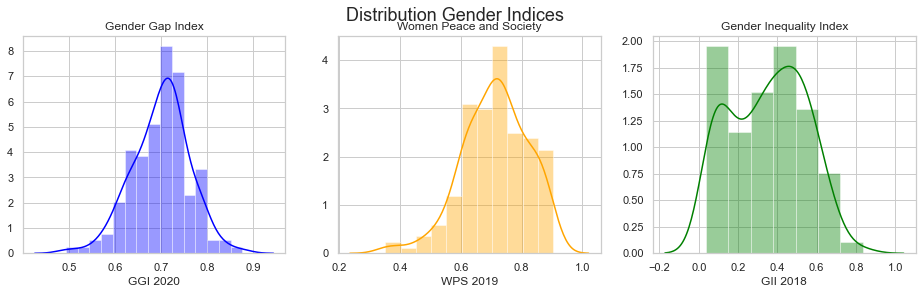

In [6]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
  
fig.suptitle('Distribution Gender Indices', fontsize=18)

ax[0] = sns.distplot(df_Gender_Climate['GGI 2020'], ax = ax[0], color = 'blue')
ax[0].set_title("Gender Gap Index", fontsize=12)
ax[0].set_xlabel("GGI 2020", fontsize=12)
ax[0].set_ylabel("", fontsize=12)

ax[1] = sns.distplot(df_Gender_Climate['WPS 2019'], ax = ax[1], color = 'orange')
ax[1].set_title("Women Peace and Society", fontsize=12)
ax[1].set_xlabel("WPS 2019", fontsize=12)
ax[1].set_ylabel("", fontsize=12)

ax[2] = sns.distplot(df_Gender_Climate['GII 2018'], ax = ax[2], color = 'green')
ax[2].set_title("Gender Inequality Index", fontsize=12)
ax[2].set_xlabel("GII 2018", fontsize=12)
ax[2].set_ylabel("", fontsize=12)

/Users/Mathou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Mathou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Mathou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

Text(0, 0.5, '')

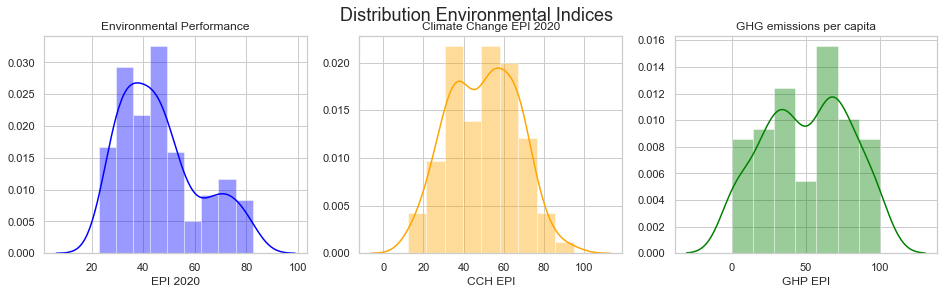

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
  
fig.suptitle('Distribution Environmental Indices', fontsize=18)

ax[0] = sns.distplot(df_Gender_Climate['EPI 2020'], ax = ax[0], color = 'blue')
ax[0].set_title("Environmental Performance", fontsize=12)
ax[0].set_xlabel("EPI 2020", fontsize=12)
ax[0].set_ylabel("", fontsize=12)

ax[1] = sns.distplot(df_Gender_Climate['CCH EPI 2020'], ax = ax[1], color = 'orange')
ax[1].set_title("Climate Change EPI 2020", fontsize=12)
ax[1].set_xlabel("CCH EPI", fontsize=12)
ax[1].set_ylabel("", fontsize=12)

ax[2] = sns.distplot(df_Gender_Climate['GHP EPI 2020'], ax = ax[2], color = 'green')
ax[2].set_title("GHG emissions per capita", fontsize=12)
ax[2].set_xlabel("GHP EPI", fontsize=12)
ax[2].set_ylabel("", fontsize=12)

Text(0.5, 0, 'EPI')

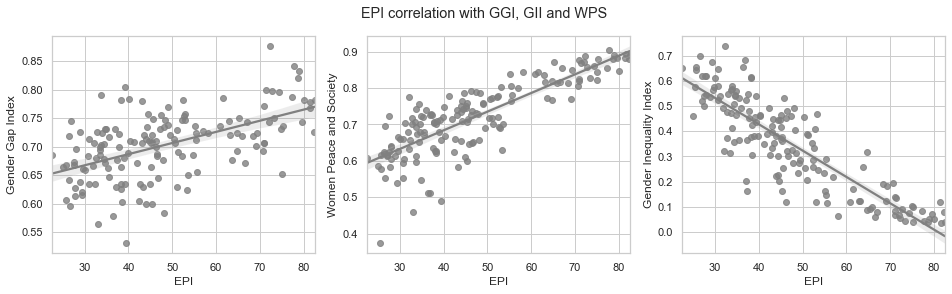

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
  
fig.suptitle('EPI correlation with GGI, GII and WPS')

sns.regplot(ax=ax[0], data=df_Gender_Climate, x='EPI 2020', y='GGI 2020', color = 'grey')
ax[0].set_ylabel('Gender Gap Index')
ax[0].set_xlabel('EPI')

sns.regplot(ax=ax[1], data=df_Gender_Climate, x='EPI 2020', y='WPS 2019', color = 'grey')
ax[1].set_ylabel('Women Peace and Society')
ax[1].set_xlabel('EPI')

sns.regplot(ax=ax[2], data=df_Gender_Climate, x='EPI 2020', y='GII 2018', color = 'grey') 
ax[2].set_ylabel('Gender Inequality Index')
ax[2].set_xlabel('EPI')

Text(0.5, 0, 'EPI')

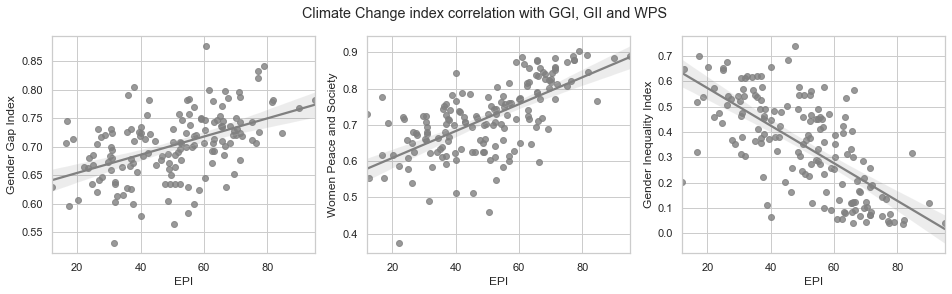

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
  
fig.suptitle('Climate Change index correlation with GGI, GII and WPS')

sns.regplot(ax=ax[0], data=df_Gender_Climate, x='CCH EPI 2020', y='GGI 2020', color = 'grey')
ax[0].set_ylabel('Gender Gap Index')
ax[0].set_xlabel('EPI')

sns.regplot(ax=ax[1], data=df_Gender_Climate, x='CCH EPI 2020', y='WPS 2019', color = 'grey')
ax[1].set_ylabel('Women Peace and Society')
ax[1].set_xlabel('EPI')

sns.regplot(ax=ax[2], data=df_Gender_Climate, x='CCH EPI 2020', y='GII 2018', color = 'grey') 
ax[2].set_ylabel('Gender Inequality Index')
ax[2].set_xlabel('EPI')

Text(0.5, 0, 'EPI')

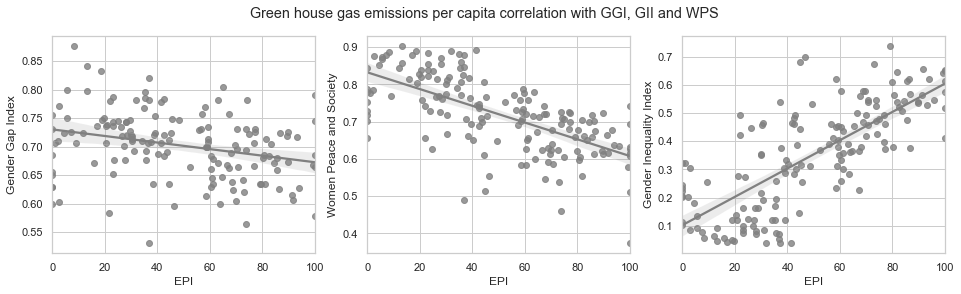

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
  
fig.suptitle('Green house gas emissions per capita correlation with GGI, GII and WPS')

sns.regplot(ax=ax[0], data=df_Gender_Climate, x='GHP EPI 2020', y='GGI 2020', color = 'grey')
ax[0].set_ylabel('Gender Gap Index')
ax[0].set_xlabel('EPI')

sns.regplot(ax=ax[1], data=df_Gender_Climate, x='GHP EPI 2020', y='WPS 2019', color = 'grey')
ax[1].set_ylabel('Women Peace and Society')
ax[1].set_xlabel('EPI')

sns.regplot(ax=ax[2], data=df_Gender_Climate, x='GHP EPI 2020', y='GII 2018', color = 'grey') 
ax[2].set_ylabel('Gender Inequality Index')
ax[2].set_xlabel('EPI')

In [11]:
data_file1 =('Regional and WB classification Thesis.xlsx')
df_Regions_Gender_Climate = pd.read_excel(data_file1, index_col=0)

In [12]:
df_Regions_Gender_Climate.head()

,Region,OECD GGI 2020,OECD WPS 2019,OECD EPI 2020,OECD GII 2018,OECD CCH EPI 2020,OECD GHP EPI 2020,OECD EPI.change,OECD CCH.change,OECD GHP.change,...,Region.4,LAM GGI 2020,LAM WPS 2019,LAM EPI 2020,LAM GII 2018,LAM CCH EPI 2020,LAM GHP EPI 2020,LAM EPI.change,LAM CCH.change,LAM GHP.change
Country,,,,,,,,,,,,,,,,,,,,,
Albania,OECD,0.769,0.759,49.0,0.234,56.8,58.3,10.2,14.7,-6.0,...,LAM,999.000,999.000,48.5,999.000,58.5,35.2,3.3,12.4,-0.3
Australia,OECD,0.731,0.844,74.9,0.103,70.4,0.0,5.5,5.5,0.0,...,LAM,0.746,0.775,52.2,0.354,60.2,29.8,5.0,10.1,1.1
Austria,OECD,0.744,0.884,79.6,0.073,71.3,23.0,5.4,7.8,0.3,...,LAM,0.720,999.000,43.5,0.353,28.7,29.9,-2.4,-26.6,-6.7
Belgium,OECD,0.750,0.827,73.3,0.045,70.2,19.6,2.1,-2.9,1.9,...,LAM,0.749,0.715,45.6,0.256,59.1,45.7,0.9,2.4,1.5
Bosnia and Herzegovina,OECD,0.720,0.760,45.4,0.162,57.5,28.6,10.9,27.4,-11.9,...,LAM,0.671,0.716,41.9,0.391,37.7,63.2,-2.0,-5.4,-3.5


In [13]:
df_Regions_Gender_Climate['OECD GGI 2020'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Regions_Gender_Climate['ASIA GGI 2020'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Regions_Gender_Climate['REF GGI 2020'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Regions_Gender_Climate['LAM GGI 2020'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Regions_Gender_Climate['MAF GGI 2020'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Regions_Gender_Climate['OECD EPI 2020'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Regions_Gender_Climate['ASIA EPI 2020'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Regions_Gender_Climate['LAM EPI 2020'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Regions_Gender_Climate['MAF EPI 2020'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Regions_Gender_Climate['REF EPI 2020'].replace(to_replace=[999], value=np.nan, inplace=True)

Text(0.5, 0, 'EPI')

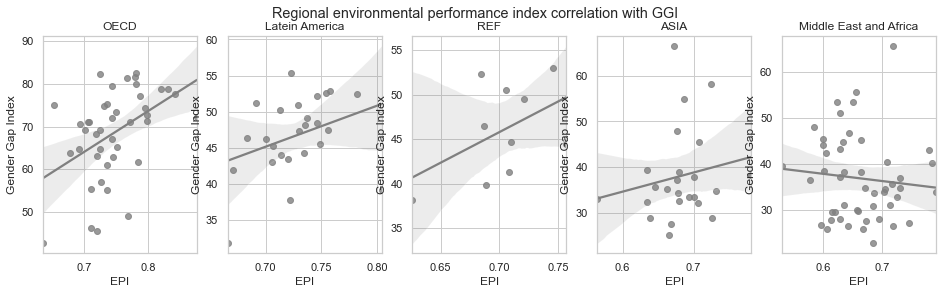

In [14]:
fig, ax = plt.subplots(1, 5, figsize=(16, 4))
  
fig.suptitle('Regional environmental performance index correlation with GGI')

sns.regplot(ax=ax[0], data=df_Regions_Gender_Climate, x='OECD GGI 2020', y='OECD EPI 2020', color = 'grey')
ax[0].set_title("OECD", fontsize=12)
ax[0].set_ylabel('Gender Gap Index')
ax[0].set_xlabel('EPI')

sns.regplot(ax=ax[1], data=df_Regions_Gender_Climate, x='LAM GGI 2020', y='LAM EPI 2020', color = 'grey')
ax[1].set_title("Latein America", fontsize=12)
ax[1].set_ylabel('Gender Gap Index')
ax[1].set_xlabel('EPI')

sns.regplot(ax=ax[2], data=df_Regions_Gender_Climate, x='REF GGI 2020', y='REF EPI 2020', color = 'grey') 
ax[2].set_title("REF", fontsize=12)
ax[2].set_ylabel('Gender Gap Index')
ax[2].set_xlabel('EPI')

sns.regplot(ax=ax[3], data=df_Regions_Gender_Climate, x='ASIA GGI 2020', y='ASIA EPI 2020', color = 'grey')
ax[3].set_title("ASIA", fontsize=12)
ax[3].set_ylabel('Gender Gap Index')
ax[3].set_xlabel('EPI')

sns.regplot(ax=ax[4], data=df_Regions_Gender_Climate, x='MAF GGI 2020', y='MAF EPI 2020', color = 'grey') 
ax[4].set_title("Middle East and Africa", fontsize=12)
ax[4].set_ylabel('Gender Gap Index')
ax[4].set_xlabel('EPI')

In [15]:
df_Regions_Gender_Climate['OECD GII 2018'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Regions_Gender_Climate['ASIA GII 2018'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Regions_Gender_Climate['REF GII 2018'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Regions_Gender_Climate['LAM GII 2018'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Regions_Gender_Climate['MAF GII 2018'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Regions_Gender_Climate['OECD WPS 2019'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Regions_Gender_Climate['ASIA WPS 2019'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Regions_Gender_Climate['REF WPS 2019'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Regions_Gender_Climate['LAM WPS 2019'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Regions_Gender_Climate['MAF WPS 2019'].replace(to_replace=[999], value=np.nan, inplace=True)

Text(0.5, 0, 'EPI')

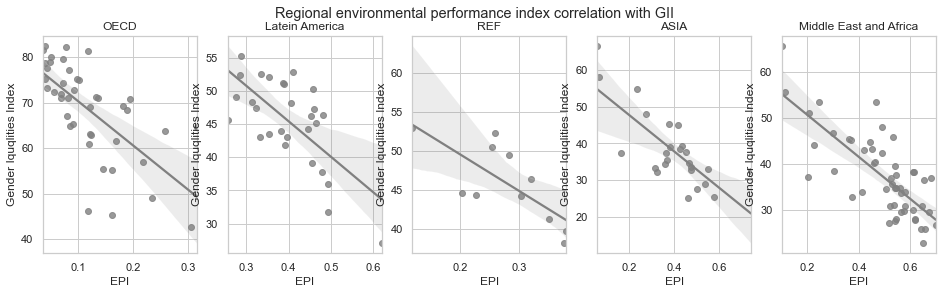

In [16]:
fig, ax = plt.subplots(1, 5, figsize=(16, 4))
  
fig.suptitle('Regional environmental performance index correlation with GII')

sns.regplot(ax=ax[0], data=df_Regions_Gender_Climate, x='OECD GII 2018', y='OECD EPI 2020', color = 'grey')
ax[0].set_title("OECD", fontsize=12)
ax[0].set_ylabel('Gender Iquqlities Index')
ax[0].set_xlabel('EPI')

sns.regplot(ax=ax[1], data=df_Regions_Gender_Climate, x='LAM GII 2018', y='LAM EPI 2020', color = 'grey')
ax[1].set_title("Latein America", fontsize=12)
ax[1].set_ylabel('Gender Iquqlities Index')
ax[1].set_xlabel('EPI')

sns.regplot(ax=ax[2], data=df_Regions_Gender_Climate, x='REF GII 2018', y='REF EPI 2020', color = 'grey') 
ax[2].set_title("REF", fontsize=12)
ax[2].set_ylabel('Gender Iquqlities Index')
ax[2].set_xlabel('EPI')

sns.regplot(ax=ax[3], data=df_Regions_Gender_Climate, x='ASIA GII 2018', y='ASIA EPI 2020', color = 'grey')
ax[3].set_title("ASIA", fontsize=12)
ax[3].set_ylabel('Gender Iquqlities Index')
ax[3].set_xlabel('EPI')

sns.regplot(ax=ax[4], data=df_Regions_Gender_Climate, x='MAF GII 2018', y='MAF EPI 2020', color = 'grey') 
ax[4].set_title("Middle East and Africa", fontsize=12)
ax[4].set_ylabel('Gender Iquqlities Index')
ax[4].set_xlabel('EPI')

Text(0.5, 0, 'EPI')

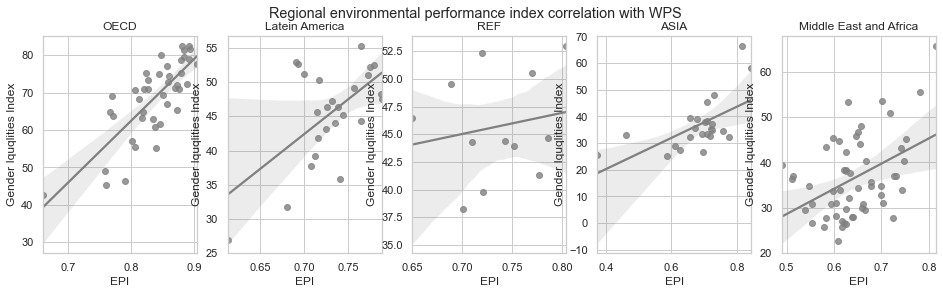

In [17]:
fig, ax = plt.subplots(1, 5, figsize=(16, 4))
  
fig.suptitle('Regional environmental performance index correlation with WPS')

sns.regplot(ax=ax[0], data=df_Regions_Gender_Climate, x='OECD WPS 2019', y='OECD EPI 2020', color = 'grey')
ax[0].set_title("OECD", fontsize=12)
ax[0].set_ylabel('Gender Iquqlities Index')
ax[0].set_xlabel('EPI')

sns.regplot(ax=ax[1], data=df_Regions_Gender_Climate, x='LAM WPS 2019', y='LAM EPI 2020', color = 'grey')
ax[1].set_title("Latein America", fontsize=12)
ax[1].set_ylabel('Gender Iquqlities Index')
ax[1].set_xlabel('EPI')

sns.regplot(ax=ax[2], data=df_Regions_Gender_Climate, x='REF WPS 2019', y='REF EPI 2020', color = 'grey') 
ax[2].set_title("REF", fontsize=12)
ax[2].set_ylabel('Gender Iquqlities Index')
ax[2].set_xlabel('EPI')

sns.regplot(ax=ax[3], data=df_Regions_Gender_Climate, x='ASIA WPS 2019', y='ASIA EPI 2020', color = 'grey')
ax[3].set_title("ASIA", fontsize=12)
ax[3].set_ylabel('Gender Iquqlities Index')
ax[3].set_xlabel('EPI')

sns.regplot(ax=ax[4], data=df_Regions_Gender_Climate, x='MAF WPS 2019', y='MAF EPI 2020', color = 'grey') 
ax[4].set_title("Middle East and Africa", fontsize=12)
ax[4].set_ylabel('Gender Iquqlities Index')
ax[4].set_xlabel('EPI')

Text(0.5, 0, 'Greenhouse gas emissions')

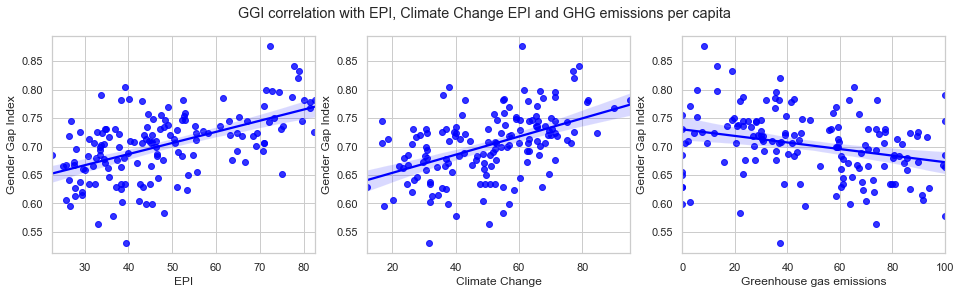

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
  
fig.suptitle('GGI correlation with EPI, Climate Change EPI and GHG emissions per capita')

sns.regplot(ax=ax[0], data=df_Gender_Climate, x='EPI 2020', y='GGI 2020', color = 'blue')
ax[0].set_ylabel('Gender Gap Index')
ax[0].set_xlabel('EPI')

sns.regplot(ax=ax[1], data=df_Gender_Climate, x='CCH EPI 2020', y='GGI 2020', color = 'blue')
ax[1].set_ylabel('Gender Gap Index')
ax[1].set_xlabel('Climate Change')

sns.regplot(ax=ax[2], data=df_Gender_Climate, x='GHP EPI 2020', y='GGI 2020', color = 'blue') 
ax[2].set_ylabel('Gender Gap Index')
ax[2].set_xlabel('Greenhouse gas emissions')

Text(0.5, 0, 'Greenhouse gas emissions')

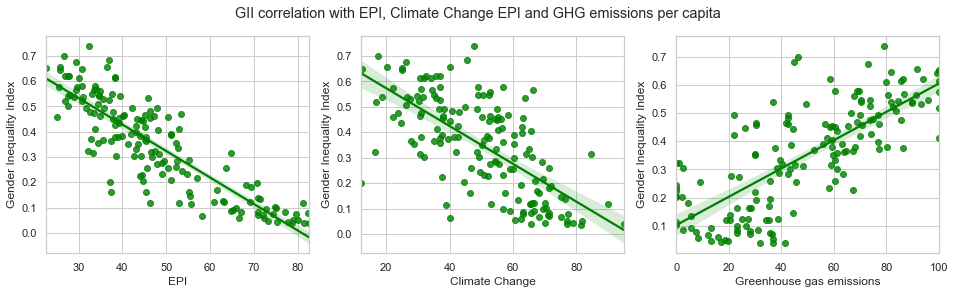

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
  
fig.suptitle('GII correlation with EPI, Climate Change EPI and GHG emissions per capita')

sns.regplot(ax=ax[0], data=df_Gender_Climate, x='EPI 2020', y='GII 2018', color = 'green')
ax[0].set_ylabel('Gender Inequality Index')
ax[0].set_xlabel('EPI')

sns.regplot(ax=ax[1], data=df_Gender_Climate, x='CCH EPI 2020', y='GII 2018', color = 'green')
ax[1].set_ylabel('Gender Inequality Index')
ax[1].set_xlabel('Climate Change')

sns.regplot(ax=ax[2], data=df_Gender_Climate, x='GHP EPI 2020', y='GII 2018', color = 'green') 
ax[2].set_ylabel('Gender Inequality Index')
ax[2].set_xlabel('Greenhouse gas emissions')

Text(0.5, 0, 'EPI')

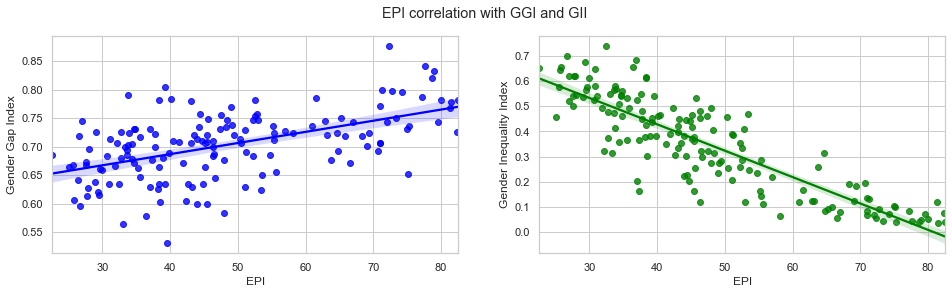

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
  
fig.suptitle('EPI correlation with GGI and GII')

sns.regplot(ax=ax[0], data=df_Gender_Climate, x='EPI 2020', y='GGI 2020', color = 'blue')
ax[0].set_ylabel('Gender Gap Index')
ax[0].set_xlabel('EPI')


sns.regplot(ax=ax[1], data=df_Gender_Climate, x='EPI 2020', y='GII 2018', color = 'green') 
ax[1].set_ylabel('Gender Inequality Index')
ax[1].set_xlabel('EPI')

In [21]:
stats.spearmanr(df_Gender_Climate['GGI 2020'], df_Gender_Climate['EPI 2020'], nan_policy = 'omit')

SpearmanrResult(correlation=0.5258483216332386, pvalue=4.1111611207122865e-12)

In [22]:
stats.spearmanr(df_Gender_Climate['GII 2018'], df_Gender_Climate['EPI 2020'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.8629820843856734, pvalue=2.064283649354064e-48)

In [23]:
stats.spearmanr(df_Gender_Climate['GGI 2020'], df_Gender_Climate['CCH EPI 2020'], nan_policy = 'omit')

SpearmanrResult(correlation=0.49691240804802017, pvalue=8.600921470757621e-11)

In [24]:
stats.spearmanr(df_Gender_Climate['GGI 2020'], df_Gender_Climate['GHP EPI 2020'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.3077024310657259, pvalue=0.00012135934137576368)

In [25]:
stats.spearmanr(df_Gender_Climate['GII 2018'], df_Gender_Climate['CCH EPI 2020'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.6955530659224156, pvalue=2.5983970745499873e-24)

In [26]:
stats.spearmanr(df_Gender_Climate['GII 2018'], df_Gender_Climate['GHP EPI 2020'], nan_policy = 'omit')

SpearmanrResult(correlation=0.7702869970869765, pvalue=1.7349636099107107e-32)

In [27]:
data_file2 =('WB-Regions-Diss-Data.xlsx')
df_WB_Regions_Gender_Climate = pd.read_excel(data_file2, index_col=0)

In [28]:
df_WB_Regions_Gender_Climate['GII 2018 LW'].replace(to_replace=[999], value=np.nan, inplace=True)
df_WB_Regions_Gender_Climate['GII 2018 LM'].replace(to_replace=[999], value=np.nan, inplace=True)
df_WB_Regions_Gender_Climate['GII 2018 UM'].replace(to_replace=[999], value=np.nan, inplace=True)
df_WB_Regions_Gender_Climate['GII 2018 HG'].replace(to_replace=[999], value=np.nan, inplace=True)

df_WB_Regions_Gender_Climate['GGI 2020 LW'].replace(to_replace=[999], value=np.nan, inplace=True)
df_WB_Regions_Gender_Climate['GGI 2020 LM'].replace(to_replace=[999], value=np.nan, inplace=True)
df_WB_Regions_Gender_Climate['GGI 2020 UM'].replace(to_replace=[999], value=np.nan, inplace=True)
df_WB_Regions_Gender_Climate['GGI 2020 HG'].replace(to_replace=[999], value=np.nan, inplace=True)

df_WB_Regions_Gender_Climate['EPI 2020 LW'].replace(to_replace=[999], value=np.nan, inplace=True)
df_WB_Regions_Gender_Climate['EPI 2020 LM'].replace(to_replace=[999], value=np.nan, inplace=True)
df_WB_Regions_Gender_Climate['EPI 2020 UM'].replace(to_replace=[999], value=np.nan, inplace=True)
df_WB_Regions_Gender_Climate['EPI 2020 HG'].replace(to_replace=[999], value=np.nan, inplace=True)

df_WB_Regions_Gender_Climate['CCH EPI 2020 LW'].replace(to_replace=[999], value=np.nan, inplace=True)
df_WB_Regions_Gender_Climate['CCH EPI 2020 LM'].replace(to_replace=[999], value=np.nan, inplace=True)
df_WB_Regions_Gender_Climate['CCH EPI 2020 UM'].replace(to_replace=[999], value=np.nan, inplace=True)
df_WB_Regions_Gender_Climate['CCH EPI 2020 HG'].replace(to_replace=[999], value=np.nan, inplace=True)

df_WB_Regions_Gender_Climate['GHP EPI 2020 LW'].replace(to_replace=[999], value=np.nan, inplace=True)
df_WB_Regions_Gender_Climate['GHP EPI 2020 LM'].replace(to_replace=[999], value=np.nan, inplace=True)
df_WB_Regions_Gender_Climate['GHP EPI 2020 UM'].replace(to_replace=[999], value=np.nan, inplace=True)
df_WB_Regions_Gender_Climate['GHP EPI 2020 HG'].replace(to_replace=[999], value=np.nan, inplace=True)

Text(0.5, 0, 'EPI')

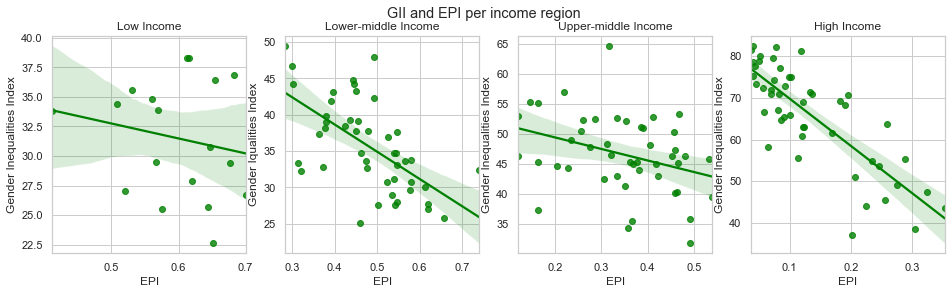

In [29]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
  
fig.suptitle('GII and EPI per income region')

sns.regplot(ax=ax[0], data=df_WB_Regions_Gender_Climate, x='GII 2018 LW', y='EPI 2020 LW', color = 'green')
ax[0].set_title("Low Income", fontsize=12)
ax[0].set_ylabel('Gender Inequalities Index')
ax[0].set_xlabel('EPI')

sns.regplot(ax=ax[1], data=df_WB_Regions_Gender_Climate, x='GII 2018 LM', y='EPI 2020 LM', color = 'green')
ax[1].set_title("Lower-middle Income", fontsize=12)
ax[1].set_ylabel('Gender Iqualities Index')
ax[1].set_xlabel('EPI')

sns.regplot(ax=ax[2], data=df_WB_Regions_Gender_Climate, x='GII 2018 UM', y='EPI 2020 UM', color = 'green')
ax[2].set_title("Upper-middle Income", fontsize=12)
ax[2].set_ylabel('Gender Inequalities Index')
ax[2].set_xlabel('EPI')

sns.regplot(ax=ax[3], data=df_WB_Regions_Gender_Climate, x='GII 2018 HG', y='EPI 2020 HG', color = 'green')
ax[3].set_title("High Income", fontsize=12)
ax[3].set_ylabel('Gender Inequalities Index')
ax[3].set_xlabel('EPI')

Text(0.5, 0, 'EPI')

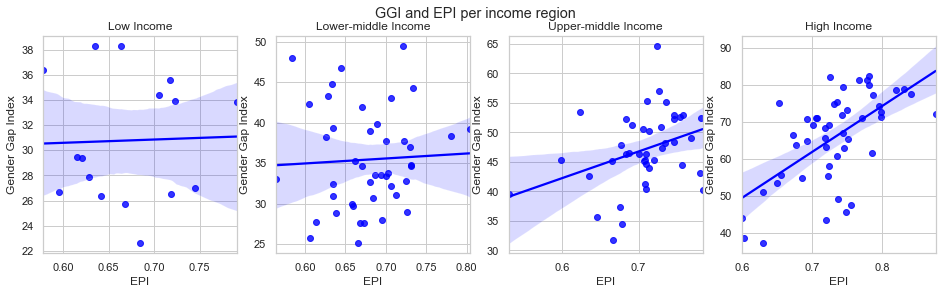

In [30]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
  
fig.suptitle('GGI and EPI per income region')

sns.regplot(ax=ax[0], data=df_WB_Regions_Gender_Climate, x='GGI 2020 LW', y='EPI 2020 LW', color = 'blue')
ax[0].set_title("Low Income", fontsize=12)
ax[0].set_ylabel('Gender Gap Index')
ax[0].set_xlabel('EPI')

sns.regplot(ax=ax[1], data=df_WB_Regions_Gender_Climate, x='GGI 2020 LM', y='EPI 2020 LM', color = 'blue')
ax[1].set_title("Lower-middle Income", fontsize=12)
ax[1].set_ylabel('Gender Gap Index')
ax[1].set_xlabel('EPI')

sns.regplot(ax=ax[2], data=df_WB_Regions_Gender_Climate, x='GGI 2020 UM', y='EPI 2020 UM', color = 'blue')
ax[2].set_title("Upper-middle Income", fontsize=12)
ax[2].set_ylabel('Gender Gap Index')
ax[2].set_xlabel('EPI')

sns.regplot(ax=ax[3], data=df_WB_Regions_Gender_Climate, x='GGI 2020 HG', y='EPI 2020 HG', color = 'blue')
ax[3].set_title("High Income", fontsize=12)
ax[3].set_ylabel('Gender Gap Index')
ax[3].set_xlabel('EPI')

In [31]:
stats.spearmanr(df_WB_Regions_Gender_Climate['GGI 2020 LW'], df_WB_Regions_Gender_Climate['EPI 2020 LW'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.08241356167873644, pvalue=0.7615624197209059)

In [32]:
stats.spearmanr(df_WB_Regions_Gender_Climate['GGI 2020 HG'], df_WB_Regions_Gender_Climate['EPI 2020 HG'], nan_policy = 'omit')

SpearmanrResult(correlation=0.5805052316821937, pvalue=1.2289654177475377e-05)

In [33]:
stats.spearmanr(df_WB_Regions_Gender_Climate['GII 2018 LW'], df_WB_Regions_Gender_Climate['EPI 2020 LW'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.13835830444738664, pvalue=0.5840299899236304)

In [34]:
stats.spearmanr(df_WB_Regions_Gender_Climate['GII 2018 HG'], df_WB_Regions_Gender_Climate['EPI 2020 HG'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.7838134363279005, pvalue=2.7488549872294555e-11)

In [35]:
stats.spearmanr(df_WB_Regions_Gender_Climate['GII 2018 LM'], df_WB_Regions_Gender_Climate['EPI 2020 LM'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.6327997288719998, pvalue=2.375161274251616e-06)

In [36]:
stats.spearmanr(df_WB_Regions_Gender_Climate['GII 2018 UM'], df_WB_Regions_Gender_Climate['EPI 2020 UM'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.3426694237195806, pvalue=0.019742428141538208)

In [37]:
stats.spearmanr(df_WB_Regions_Gender_Climate['GGI 2020 UM'], df_WB_Regions_Gender_Climate['EPI 2020 UM'], nan_policy = 'omit')

SpearmanrResult(correlation=0.38640509131495115, pvalue=0.01148300255817043)

In [38]:
stats.spearmanr(df_WB_Regions_Gender_Climate['GII 2018 HG'], df_WB_Regions_Gender_Climate['EPI 2020 HG'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.7838134363279005, pvalue=2.7488549872294555e-11)

In [39]:
df_Gender_Climate['EPI.change'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Gender_Climate['CCH.change'].replace(to_replace=[999], value=np.nan, inplace=True)
df_Gender_Climate['GHP.change'].replace(to_replace=[999], value=np.nan, inplace=True)

In [40]:
print("Basic statistics on each floating point variable:")  
display(df_Gender_Climate.describe(include=[np.float]))

Basic statistics on each floating point variable:


,GGIE 2020,GGIEA 2020,GGIH 2020,GGIP 2020,GGI 2020,WPS 2019,GII 2019,GII 2018,EPI 2020,GIB EPI 2020,CCH EPI 2020,GHP EPI 2020,EPI.change,GIB.change,CCH.change,GHP.change,EPI 2010,GIB EPI 2010,CCH EPI 2010,GHP EPI 2010
count,186.000000,186.000000,186.000000,186.000000,153.000000,167.000000,186.000000,162.000000,180.000000,186.000000,180.000000,180.000000,180.000000,186.000000,180.000000,180.000000,186.000000,186.000000,186.000000,186.000000
mean,177.777656,178.030237,178.041930,177.421538,0.700196,0.712257,129.202973,0.350852,46.443889,79.468817,49.758889,50.766667,2.394444,29.086559,2.013333,-0.738333,74.854301,82.608065,78.431183,87.440323
std,382.421798,382.304167,382.298715,382.587638,0.061693,0.108008,335.688684,0.192234,15.450625,169.791521,17.056272,28.696026,5.241516,179.761511,15.971365,6.186842,169.743121,169.327764,169.297127,183.071624
min,0.227000,0.589000,0.926000,0.000000,0.494000,0.351000,0.025000,0.037000,22.600000,0.000000,12.100000,0.000000,-11.900000,-100.000000,-41.600000,-23.600000,20.500000,0.000000,6.400000,0.000000
25%,0.618000,0.969250,0.971000,0.129250,0.665000,0.639500,0.204500,0.174500,34.275000,36.200000,36.850000,28.175000,-0.900000,-15.850000,-5.400000,-4.425000,33.725000,40.900000,36.875000,28.175000
50%,0.701500,0.996000,0.977000,0.223500,0.707000,0.717000,0.406500,0.368000,44.000000,48.900000,50.850000,54.150000,2.350000,-1.150000,3.350000,-0.500000,41.800000,51.350000,50.700000,58.700000
75%,0.791500,1.000000,0.980000,0.465750,0.736000,0.786500,0.555250,0.498750,54.900000,63.325000,63.150000,73.200000,5.650000,15.125000,12.750000,2.400000,52.525000,68.975000,60.850000,76.275000
max,999.000000,999.000000,999.000000,999.000000,0.877000,0.904000,999.000000,0.834000,82.500000,999.000000,95.000000,100.000000,17.300000,999.000000,42.600000,19.300000,999.000000,999.000000,999.000000,999.000000


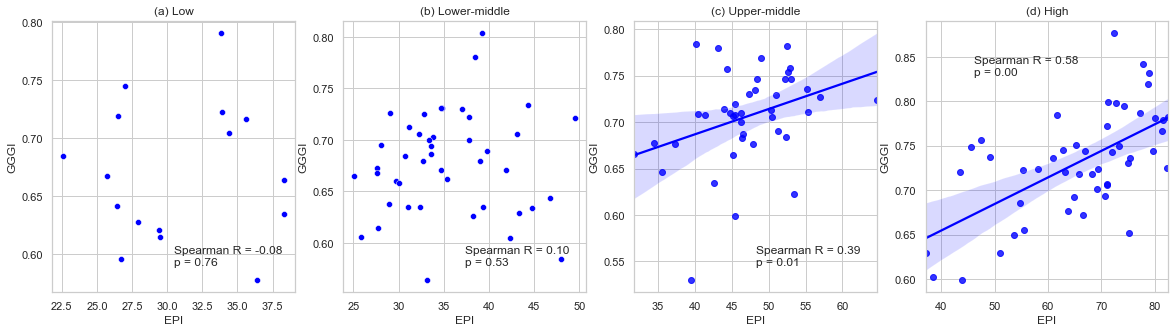

In [94]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
rp_GGILW = stats.spearmanr(df_WB_Regions_Gender_Climate['GGI 2020 LW'], df_WB_Regions_Gender_Climate['EPI 2020 LW'], nan_policy = 'omit')
rp_GGILM = stats.spearmanr(df_WB_Regions_Gender_Climate['GGI 2020 LM'], df_WB_Regions_Gender_Climate['EPI 2020 LM'], nan_policy = 'omit')
rp_GGIUM = stats.spearmanr(df_WB_Regions_Gender_Climate['GGI 2020 UM'], df_WB_Regions_Gender_Climate['EPI 2020 UM'], nan_policy = 'omit')
rp_GGIHG = stats.spearmanr(df_WB_Regions_Gender_Climate['GGI 2020 HG'], df_WB_Regions_Gender_Climate['EPI 2020 HG'], nan_policy = 'omit')

sns.scatterplot(ax=ax[0], data=df_WB_Regions_Gender_Climate, x='EPI 2020 LW', y='GGI 2020 LW', color = 'blue')
ax[0].set_title("(a) Low", fontsize=12)
ax[0].set_ylabel('GGGI')
ax[0].set_xlabel('EPI')
ax[0].text(0.5, 0.1, "Spearman R = {:.2f}\np = {:.2f}".format(rp_GGILW[0],rp_GGILW[1]), transform=ax[0].transAxes)

sns.scatterplot(ax=ax[1], data=df_WB_Regions_Gender_Climate, x='EPI 2020 LM', y='GGI 2020 LM', color = 'blue')
ax[1].set_title("(b) Lower-middle", fontsize=12)
ax[1].set_ylabel('GGGI')
ax[1].set_xlabel('EPI')
ax[1].text(0.5, 0.1, "Spearman R = {:.2f}\np = {:.2f}".format(rp_GGILM[0],rp_GGILM[1]), transform=ax[1].transAxes)

sns.regplot(ax=ax[2], data=df_WB_Regions_Gender_Climate, x='EPI 2020 UM', y='GGI 2020 UM', color = 'blue')
ax[2].set_title("(c) Upper-middle", fontsize=12)
ax[2].set_ylabel('GGGI')
ax[2].set_xlabel('EPI')
ax[2].text(0.5, 0.1, "Spearman R = {:.2f}\np = {:.2f}".format(rp_GGIUM[0],rp_GGIUM[1]), transform=ax[2].transAxes)

sns.regplot(ax=ax[3], data=df_WB_Regions_Gender_Climate, x='EPI 2020 HG', y='GGI 2020 HG', color = 'blue')
ax[3].set_title("(d) High", fontsize=12)
ax[3].set_ylabel('GGGI')
ax[3].set_xlabel('EPI')
ax[3].text(0.2, 0.8, "Spearman R = {:.2f}\np = {:.2f}".format(rp_GGIHG[0],rp_GGIHG[1]), transform=ax[3].transAxes)

plt.savefig('H2_graph1')

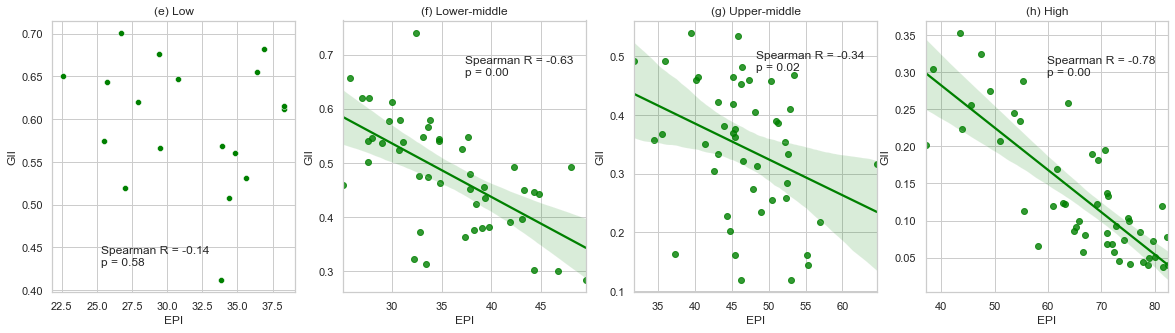

In [93]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
rp_GIILW = stats.spearmanr(df_WB_Regions_Gender_Climate['GII 2018 LW'], df_WB_Regions_Gender_Climate['EPI 2020 LW'], nan_policy = 'omit')
rp_GIILM = stats.spearmanr(df_WB_Regions_Gender_Climate['GII 2018 LM'], df_WB_Regions_Gender_Climate['EPI 2020 LM'], nan_policy = 'omit')
rp_GIIUM = stats.spearmanr(df_WB_Regions_Gender_Climate['GII 2018 UM'], df_WB_Regions_Gender_Climate['EPI 2020 UM'], nan_policy = 'omit')
rp_GIIHG = stats.spearmanr(df_WB_Regions_Gender_Climate['GII 2018 HG'], df_WB_Regions_Gender_Climate['EPI 2020 HG'], nan_policy = 'omit')

sns.scatterplot(ax=ax[0], data=df_WB_Regions_Gender_Climate, x='EPI 2020 LW', y='GII 2018 LW', color = 'green')
ax[0].set_title("(e) Low", fontsize=12)
ax[0].set_ylabel('GII')
ax[0].set_xlabel('EPI')
ax[0].text(0.2, 0.1, "Spearman R = {:.2f}\np = {:.2f}".format(rp_GIILW[0],rp_GIILW[1]), transform=ax[0].transAxes)

sns.regplot(ax=ax[1], data=df_WB_Regions_Gender_Climate, x='EPI 2020 LM', y='GII 2018 LM', color = 'green')
ax[1].set_title("(f) Lower-middle", fontsize=12)
ax[1].set_ylabel('GII')
ax[1].set_xlabel('EPI')
ax[1].text(0.5, 0.8, "Spearman R = {:.2f}\np = {:.2f}".format(rp_GIILM[0],rp_GIILM[1]), transform=ax[1].transAxes)

sns.regplot(ax=ax[2], data=df_WB_Regions_Gender_Climate, x='EPI 2020 UM', y='GII 2018 UM', color = 'green')
ax[2].set_title("(g) Upper-middle", fontsize=12)
ax[2].set_ylabel('GII')
ax[2].set_xlabel('EPI')
ax[2].text(0.5, 0.818, "Spearman R = {:.2f}\np = {:.2f}".format(rp_GIIUM[0],rp_GIIUM[1]), transform=ax[2].transAxes)

sns.regplot(ax=ax[3], data=df_WB_Regions_Gender_Climate, x='EPI 2020 HG', y='GII 2018 HG', color = 'green')
ax[3].set_title("(h) High", fontsize=12)
ax[3].set_ylabel('GII')
ax[3].set_xlabel('EPI')
ax[3].text(0.5, 0.8, "Spearman R = {:.2f}\np = {:.2f}".format(rp_GIIHG[0],rp_GIIHG[1]), transform=ax[3].transAxes)

plt.savefig('H2_graph2')

Text(0.5, 0, 'EPI')

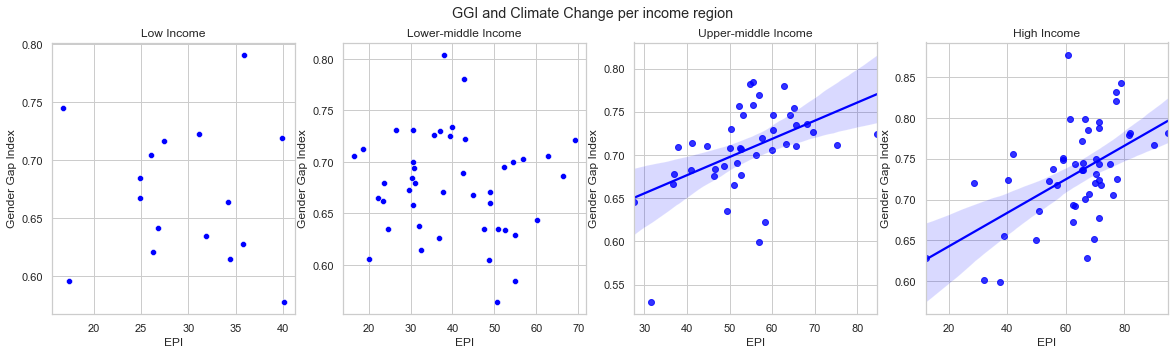

In [43]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
  
fig.suptitle('GGI and Climate Change per income region')

sns.scatterplot(ax=ax[0], data=df_WB_Regions_Gender_Climate, x='CCH EPI 2020 LW', y='GGI 2020 LW', color = 'blue')
ax[0].set_title("Low Income", fontsize=12)
ax[0].set_ylabel('Gender Gap Index')
ax[0].set_xlabel('EPI')

sns.scatterplot(ax=ax[1], data=df_WB_Regions_Gender_Climate, x='CCH EPI 2020 LM', y='GGI 2020 LM', color = 'blue')
ax[1].set_title("Lower-middle Income", fontsize=12)
ax[1].set_ylabel('Gender Gap Index')
ax[1].set_xlabel('EPI')

sns.regplot(ax=ax[2], data=df_WB_Regions_Gender_Climate, x='CCH EPI 2020 UM', y='GGI 2020 UM', color = 'blue')
ax[2].set_title("Upper-middle Income", fontsize=12)
ax[2].set_ylabel('Gender Gap Index')
ax[2].set_xlabel('EPI')

sns.regplot(ax=ax[3], data=df_WB_Regions_Gender_Climate, x='CCH EPI 2020 HG', y='GGI 2020 HG', color = 'blue')
ax[3].set_title("High Income", fontsize=12)
ax[3].set_ylabel('Gender Gap Index')
ax[3].set_xlabel('EPI')

Text(0.5, 0, 'EPI')

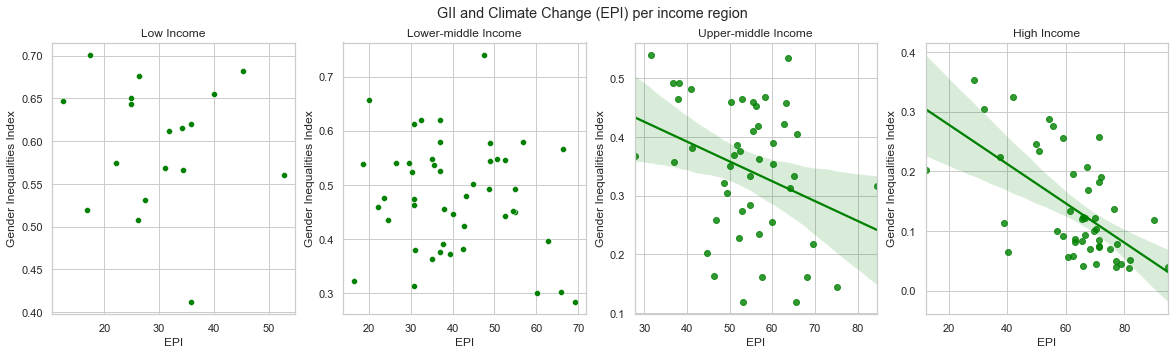

In [44]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
  
fig.suptitle('GII and Climate Change (EPI) per income region')

sns.scatterplot(ax=ax[0], data=df_WB_Regions_Gender_Climate, x='CCH EPI 2020 LW', y='GII 2018 LW', color = 'green')
ax[0].set_title("Low Income", fontsize=12)
ax[0].set_ylabel('Gender Inequalities Index')
ax[0].set_xlabel('EPI')

sns.scatterplot(ax=ax[1], data=df_WB_Regions_Gender_Climate, x='CCH EPI 2020 LM', y='GII 2018 LM', color = 'green')
ax[1].set_title("Lower-middle Income", fontsize=12)
ax[1].set_ylabel('Gender Inequalities Index')
ax[1].set_xlabel('EPI')

sns.regplot(ax=ax[2], data=df_WB_Regions_Gender_Climate, x='CCH EPI 2020 UM', y='GII 2018 UM', color = 'green')
ax[2].set_title("Upper-middle Income", fontsize=12)
ax[2].set_ylabel('Gender Inequalities Index')
ax[2].set_xlabel('EPI')

sns.regplot(ax=ax[3], data=df_WB_Regions_Gender_Climate, x='CCH EPI 2020 HG', y='GII 2018 HG', color = 'green')
ax[3].set_title("High Income", fontsize=12)
ax[3].set_ylabel('Gender Inequalities Index')
ax[3].set_xlabel('EPI')

Text(0.5, 0, 'EPI')

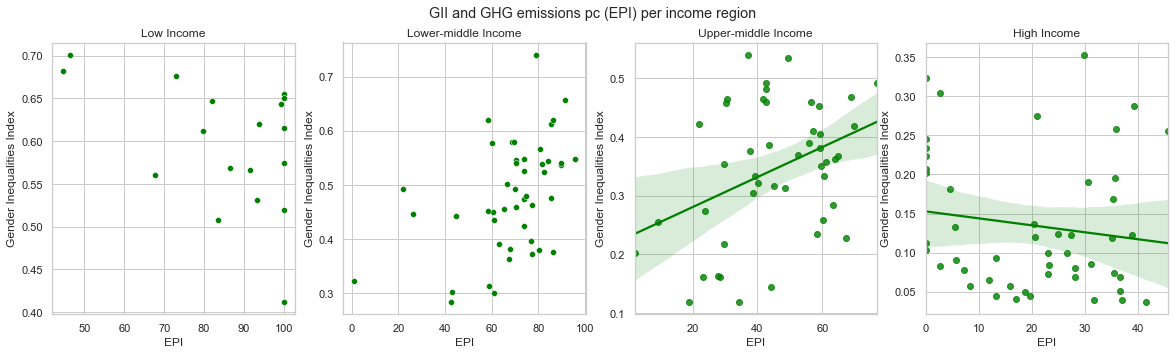

In [45]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
  
fig.suptitle('GII and GHG emissions pc (EPI) per income region')

sns.scatterplot(ax=ax[0], data=df_WB_Regions_Gender_Climate, x='GHP EPI 2020 LW', y='GII 2018 LW', color = 'green')
ax[0].set_title("Low Income", fontsize=12)
ax[0].set_ylabel('Gender Inequalities Index')
ax[0].set_xlabel('EPI')

sns.scatterplot(ax=ax[1], data=df_WB_Regions_Gender_Climate, x='GHP EPI 2020 LM', y='GII 2018 LM', color = 'green')
ax[1].set_title("Lower-middle Income", fontsize=12)
ax[1].set_ylabel('Gender Inequalities Index')
ax[1].set_xlabel('EPI')

sns.regplot(ax=ax[2], data=df_WB_Regions_Gender_Climate, x='GHP EPI 2020 UM', y='GII 2018 UM', color = 'green')
ax[2].set_title("Upper-middle Income", fontsize=12)
ax[2].set_ylabel('Gender Inequalities Index')
ax[2].set_xlabel('EPI')

sns.regplot(ax=ax[3], data=df_WB_Regions_Gender_Climate, x='GHP EPI 2020 HG', y='GII 2018 HG', color = 'green')
ax[3].set_title("High Income", fontsize=12)
ax[3].set_ylabel('Gender Inequalities Index')
ax[3].set_xlabel('EPI')

Text(0.5, 0, 'EPI')

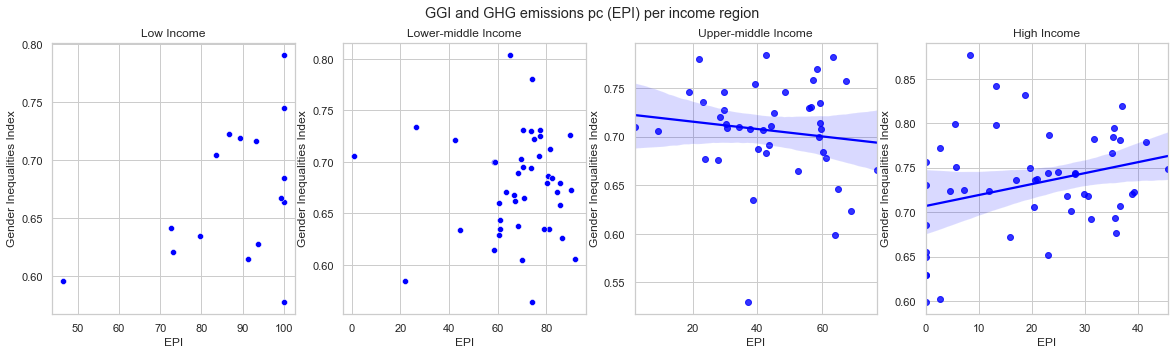

In [46]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
  
fig.suptitle('GGI and GHG emissions pc (EPI) per income region')

sns.scatterplot(ax=ax[0], data=df_WB_Regions_Gender_Climate, x='GHP EPI 2020 LW', y='GGI 2020 LW', color = 'blue')
ax[0].set_title("Low Income", fontsize=12)
ax[0].set_ylabel('Gender Inequalities Index')
ax[0].set_xlabel('EPI')

sns.scatterplot(ax=ax[1], data=df_WB_Regions_Gender_Climate, x='GHP EPI 2020 LM', y='GGI 2020 LM', color = 'blue')
ax[1].set_title("Lower-middle Income", fontsize=12)
ax[1].set_ylabel('Gender Inequalities Index')
ax[1].set_xlabel('EPI')

sns.regplot(ax=ax[2], data=df_WB_Regions_Gender_Climate, x='GHP EPI 2020 UM', y='GGI 2020 UM', color = 'blue')
ax[2].set_title("Upper-middle Income", fontsize=12)
ax[2].set_ylabel('Gender Inequalities Index')
ax[2].set_xlabel('EPI')

sns.regplot(ax=ax[3], data=df_WB_Regions_Gender_Climate, x='GHP EPI 2020 HG', y='GGI 2020 HG', color = 'blue')
ax[3].set_title("High Income", fontsize=12)
ax[3].set_ylabel('Gender Inequalities Index')
ax[3].set_xlabel('EPI')

In [47]:
stats.spearmanr(df_WB_Regions_Gender_Climate['GII 2018 UM'], df_WB_Regions_Gender_Climate['CCH EPI 2020 UM'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.2862033868299515, pvalue=0.05382345751449585)

In [48]:
stats.spearmanr(df_WB_Regions_Gender_Climate['GGI 2020 UM'], df_WB_Regions_Gender_Climate['CCH EPI 2020 UM'], nan_policy = 'omit')

SpearmanrResult(correlation=0.5302367073193447, pvalue=0.0003041468846276846)

In [49]:
stats.spearmanr(df_WB_Regions_Gender_Climate['GII 2018 LM'], df_WB_Regions_Gender_Climate['CCH EPI 2020 LM'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.10848911181357768, pvalue=0.4729536486062068)

In [50]:
stats.spearmanr(df_WB_Regions_Gender_Climate['GGI 2020 LM'], df_WB_Regions_Gender_Climate['EPI 2020 LM'], nan_policy = 'omit')

SpearmanrResult(correlation=0.09634434527635677, pvalue=0.5338576647782843)

In [51]:
stats.spearmanr(df_WB_Regions_Gender_Climate['GGI 2020 UM'], df_WB_Regions_Gender_Climate['GHP EPI 2020 UM'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.14193077920150454, pvalue=0.36992779485806704)

In [52]:
stats.spearmanr(df_WB_Regions_Gender_Climate['GII 2018 UM'], df_WB_Regions_Gender_Climate['GHP EPI 2020 UM'], nan_policy = 'omit')

SpearmanrResult(correlation=0.31109671907196174, pvalue=0.03534133906228402)

In [53]:
stats.spearmanr(df_WB_Regions_Gender_Climate['GGI 2020 HG'], df_WB_Regions_Gender_Climate['GHP EPI 2020 HG'], nan_policy = 'omit')

SpearmanrResult(correlation=0.2449438859334183, pvalue=0.0898304745882781)

In [54]:
stats.spearmanr(df_WB_Regions_Gender_Climate['GII 2018 HG'], df_WB_Regions_Gender_Climate['GHP EPI 2020 HG'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.18138625319223292, pvalue=0.21228634032893473)

In [55]:
stats.spearmanr(df_WB_Regions_Gender_Climate['GGI 2020 HG'], df_WB_Regions_Gender_Climate['CCH EPI 2020 HG'], nan_policy = 'omit')

SpearmanrResult(correlation=0.46256889401972556, pvalue=0.000818672899915724)

In [56]:
stats.spearmanr(df_WB_Regions_Gender_Climate['GII 2018 HG'], df_WB_Regions_Gender_Climate['CCH EPI 2020 HG'], nan_policy = 'omit')

SpearmanrResult(correlation=-0.5624186760345611, pvalue=2.6012430464969125e-05)

In [57]:
df_Gender_Climate['GGIP 2020'].replace(to_replace=[999], value=np.nan, inplace=True)

Text(0.5, 0, 'EPI climate change')

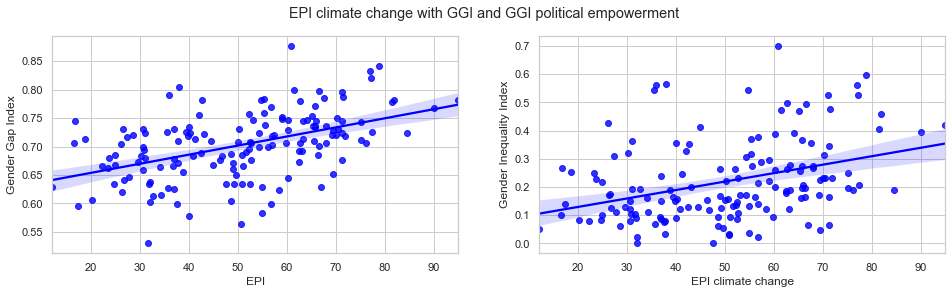

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
  
fig.suptitle('EPI climate change with GGI and GGI political empowerment')

sns.regplot(ax=ax[0], data=df_Gender_Climate, x='CCH EPI 2020', y='GGI 2020', color = 'blue')
ax[0].set_ylabel('Gender Gap Index')
ax[0].set_xlabel('EPI')


sns.regplot(ax=ax[1], data=df_Gender_Climate, x='CCH EPI 2020', y='GGIP 2020', color = 'blue') 
ax[1].set_ylabel('Gender Inequality Index')
ax[1].set_xlabel('EPI climate change')

In [59]:
stats.spearmanr(df_Gender_Climate['GGIP 2020'], df_Gender_Climate['CCH EPI 2020'], nan_policy = 'omit')

SpearmanrResult(correlation=0.39435823163824085, pvalue=5.435849608513986e-07)

In [60]:
stats.spearmanr(df_Gender_Climate['GGI 2020'], df_Gender_Climate['CCH EPI 2020'], nan_policy = 'omit')

SpearmanrResult(correlation=0.49691240804802017, pvalue=8.600921470757621e-11)

In [61]:
stats.spearmanr(df_Gender_Climate['GGIP 2020'], df_Gender_Climate['EPI 2020'], nan_policy = 'omit')

SpearmanrResult(correlation=0.3695146372247372, pvalue=3.022613672046574e-06)

In [62]:
print("Basic statistics on each floating point variable:")  
display(df_Gender_Climate.describe(include=[np.float]))

Basic statistics on each floating point variable:


,GGIE 2020,GGIEA 2020,GGIH 2020,GGIP 2020,GGI 2020,WPS 2019,GII 2019,GII 2018,EPI 2020,GIB EPI 2020,CCH EPI 2020,GHP EPI 2020,EPI.change,GIB.change,CCH.change,GHP.change,EPI 2010,GIB EPI 2010,CCH EPI 2010,GHP EPI 2010
count,186.000000,186.000000,186.000000,153.000000,153.000000,167.000000,186.000000,162.000000,180.000000,186.000000,180.000000,180.000000,180.000000,186.000000,180.000000,180.000000,186.000000,186.000000,186.000000,186.000000
mean,177.777656,178.030237,178.041930,0.218340,0.700196,0.712257,129.202973,0.350852,46.443889,79.468817,49.758889,50.766667,2.394444,29.086559,2.013333,-0.738333,74.854301,82.608065,78.431183,87.440323
std,382.421798,382.304167,382.298715,0.144055,0.061693,0.108008,335.688684,0.192234,15.450625,169.791521,17.056272,28.696026,5.241516,179.761511,15.971365,6.186842,169.743121,169.327764,169.297127,183.071624
min,0.227000,0.589000,0.926000,0.000000,0.494000,0.351000,0.025000,0.037000,22.600000,0.000000,12.100000,0.000000,-11.900000,-100.000000,-41.600000,-23.600000,20.500000,0.000000,6.400000,0.000000
25%,0.618000,0.969250,0.971000,0.111000,0.665000,0.639500,0.204500,0.174500,34.275000,36.200000,36.850000,28.175000,-0.900000,-15.850000,-5.400000,-4.425000,33.725000,40.900000,36.875000,28.175000
50%,0.701500,0.996000,0.977000,0.189000,0.707000,0.717000,0.406500,0.368000,44.000000,48.900000,50.850000,54.150000,2.350000,-1.150000,3.350000,-0.500000,41.800000,51.350000,50.700000,58.700000
75%,0.791500,1.000000,0.980000,0.278000,0.736000,0.786500,0.555250,0.498750,54.900000,63.325000,63.150000,73.200000,5.650000,15.125000,12.750000,2.400000,52.525000,68.975000,60.850000,76.275000
max,999.000000,999.000000,999.000000,0.701000,0.877000,0.904000,999.000000,0.834000,82.500000,999.000000,95.000000,100.000000,17.300000,999.000000,42.600000,19.300000,999.000000,999.000000,999.000000,999.000000


In [63]:
stats.spearmanr(df_Gender_Climate['GGI 2020'], df_Gender_Climate['EPI 2020'], nan_policy='omit')

SpearmanrResult(correlation=0.5258483216332386, pvalue=4.1111611207122865e-12)

In [64]:
df_Gender_nonans = df_Gender_Climate.dropna()

In [65]:
stats.pearsonr(df_Gender_nonans['GGI 2020'], df_Gender_nonans['EPI 2020'])

(0.5245044030085274, 2.0887857956625543e-11)

In [66]:
stats.pearsonr(df_Gender_nonans['GII 2018'], df_Gender_nonans['EPI 2020'])

(-0.8692272702133536, 1.1495662979603059e-44)

In [67]:
stats.pearsonr(df_Gender_nonans['GGI 2020'], df_Gender_nonans['CCH EPI 2020'])

(0.46448429407651987, 5.789264393860054e-09)

In [68]:
stats.pearsonr(df_Gender_nonans['GGI 2020'], df_Gender_nonans['GHP EPI 2020'])

(-0.29751844842691827, 0.00032341626101188375)

In [69]:
stats.pearsonr(df_Gender_nonans['GII 2018'], df_Gender_nonans['CCH EPI 2020'])

(-0.6961099012056495, 6.825982284132528e-22)

In [70]:
stats.pearsonr(df_Gender_nonans['GII 2018'], df_Gender_nonans['GHP EPI 2020'])

(0.7660968470121552, 1.1620670568792589e-28)

In [71]:
for name, group in df_Gender_nonans.groupby('Income group WB'):
    display(name, group)

'High income'

,Income group WB,Region 5,GGIE 2020,GGIEA 2020,GGIH 2020,GGIP 2020,GGI 2020,WPS 2019,GII 2019,GII 2018,...,CCH EPI 2020,GHP EPI 2020,EPI.change,GIB.change,CCH.change,GHP.change,EPI 2010,GIB EPI 2010,CCH EPI 2010,GHP EPI 2010
Country,,,,,,,,,,,,,,,,,,,,,
Australia,High income,OECD,0.722,1.000,0.971,0.231,0.731,0.844,0.097,0.103,...,70.4,0.0,5.5,-1.5,5.5,0.0,69.4,64.0,64.9,0.0
Austria,High income,OECD,0.659,1.000,0.974,0.344,0.744,0.884,0.069,0.073,...,71.3,23.0,5.4,3.5,7.8,0.3,74.2,39.2,63.5,22.7
Bahrain,High income,MAF,0.510,0.985,0.958,0.066,0.629,0.719,0.212,0.207,...,67.1,0.0,17.3,70.3,33.5,0.0,33.7,6.7,33.6,0.0
Barbados,High income,LAM,0.808,0.991,0.976,0.222,0.749,0.715,0.252,0.256,...,59.1,45.7,0.9,29.5,2.4,1.5,44.7,20.1,56.7,44.2
Belgium,High income,OECD,0.714,1.000,0.973,0.313,0.750,0.827,0.043,0.045,...,70.2,19.6,2.1,-6.7,-2.9,1.9,71.2,53.8,73.1,17.7
Canada,High income,OECD,0.751,1.000,0.971,0.365,0.772,0.876,0.080,0.083,...,65.7,2.7,3.7,-10.9,3.5,2.7,67.3,90.6,62.2,0.0
Chile,High income,LAM,0.608,1.000,0.977,0.307,0.723,0.764,0.247,0.288,...,54.3,39.2,3.7,0.9,3.3,-0.9,51.6,45.3,51.0,40.1
Croatia,High income,OECD,0.674,0.995,0.979,0.232,0.720,0.818,0.116,0.122,...,70.0,38.9,13.4,-2.4,22.4,5.8,49.7,52.1,47.6,33.1
Cyprus,High income,OECD,0.681,0.998,0.967,0.122,0.692,0.819,0.086,0.086,...,63.1,31.2,6.3,-12.6,12.5,4.4,58.5,50.5,50.6,26.8


'Low income'

,Income group WB,Region 5,GGIE 2020,GGIEA 2020,GGIH 2020,GGIP 2020,GGI 2020,WPS 2019,GII 2019,GII 2018,...,CCH EPI 2020,GHP EPI 2020,EPI.change,GIB.change,CCH.change,GHP.change,EPI 2010,GIB EPI 2010,CCH EPI 2010,GHP EPI 2010
Country,,,,,,,,,,,,,,,,,,,,,
Burkina Faso,Low income,MAF,0.614,0.873,0.963,0.089,0.635,0.622,0.594,0.612,...,31.9,79.7,6.9,14.5,5.9,-0.5,31.4,40.7,26.0,80.2
Burundi,Low income,MAF,0.837,0.896,0.978,0.269,0.745,0.616,0.504,0.520,...,16.8,100.0,-11.1,-3.8,-41.6,0.0,38.1,24.6,58.4,100.0
Chad,Low income,MAF,0.682,0.589,0.971,0.141,0.596,0.553,0.710,0.701,...,17.4,46.5,-0.9,-100.0,-0.9,-23.6,27.6,100.0,18.3,70.1
"Congo, Dem. Rep.",Low income,MAF,0.589,0.658,0.976,0.089,0.578,0.512,0.617,0.655,...,40.1,100.0,-0.4,17.1,-2.4,0.0,36.8,64.9,42.5,100.0
Ethiopia,Low income,MAF,0.568,0.850,0.976,0.427,0.705,0.651,0.517,0.508,...,26.1,83.5,0.2,25.6,-0.3,-2.1,34.2,69.2,26.4,85.6
"Gambia, The",Low income,MAF,0.584,0.891,0.970,0.067,0.628,0.638,0.612,0.620,...,35.8,93.8,3.6,22.6,5.0,-1.7,24.3,3.0,30.8,95.5
Liberia,Low income,MAF,0.714,0.839,0.968,0.218,0.685,0.608,0.650,0.651,...,24.9,100.0,-3.7,22.9,-8.8,0.0,26.3,5.6,33.7,100.0
Malawi,Low income,MAF,0.600,0.915,0.980,0.162,0.664,0.626,0.565,0.615,...,34.2,100.0,-2.6,-10.5,-14.1,0.0,40.9,43.9,48.3,100.0
Mali,Low income,MAF,0.591,0.757,0.965,0.171,0.621,0.539,0.671,0.676,...,26.3,73.0,-3.3,-10.4,-12.8,-2.1,32.7,47.2,39.1,75.1


'Lower middle income'

,Income group WB,Region 5,GGIE 2020,GGIEA 2020,GGIH 2020,GGIP 2020,GGI 2020,WPS 2019,GII 2019,GII 2018,...,CCH EPI 2020,GHP EPI 2020,EPI.change,GIB.change,CCH.change,GHP.change,EPI 2010,GIB EPI 2010,CCH EPI 2010,GHP EPI 2010
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,Lower middle income,MAF,0.461,0.966,0.962,0.145,0.634,0.611,0.429,0.443,...,52.5,44.6,0.5,-2.8,-5.9,0.6,44.3,43.8,58.4,44.0
Angola,Lower middle income,MAF,0.640,0.759,0.980,0.262,0.660,0.626,0.536,0.578,...,49.0,60.3,5.3,-43.4,22.4,7.9,24.4,97.3,26.6,52.4
Bangladesh,Lower middle income,ASIA,0.438,0.951,0.969,0.545,0.726,0.612,0.537,0.536,...,35.6,89.7,-0.1,2.9,1.6,-6.4,29.1,59.3,34.0,96.1
Belize,Lower middle income,LAM,0.680,0.991,0.980,0.032,0.671,0.716,0.415,0.391,...,37.7,63.2,-2.0,-27.4,-5.4,-3.5,43.9,45.1,43.1,66.7
Benin,Lower middle income,MAF,0.847,0.733,0.972,0.079,0.658,0.659,0.612,0.613,...,30.7,85.7,2.7,14.5,10.4,-1.0,27.3,22.7,20.3,86.7
Bhutan,Lower middle income,ASIA,0.544,0.954,0.960,0.082,0.635,0.657,0.421,0.436,...,24.7,61.1,-9.6,-40.3,-35.4,-10.8,48.9,84.8,60.1,71.9
Bolivia,Lower middle income,LAM,0.623,0.980,0.979,0.357,0.734,0.765,0.417,0.446,...,40.0,26.3,-0.3,42.8,-3.9,-6.4,44.6,2.4,43.9,32.7
Cambodia,Lower middle income,ASIA,0.759,0.939,0.975,0.103,0.694,0.694,0.474,0.474,...,30.9,73.8,-0.2,1.6,-0.3,-1.9,33.8,13.6,31.2,75.7
Cameroon,Lower middle income,MAF,0.689,0.885,0.973,0.196,0.686,0.597,0.560,0.566,...,66.4,80.7,1.5,16.9,2.1,9.4,32.1,62.3,64.3,71.3


'Upper middle income'

,Income group WB,Region 5,GGIE 2020,GGIEA 2020,GGIH 2020,GGIP 2020,GGI 2020,WPS 2019,GII 2019,GII 2018,...,CCH EPI 2020,GHP EPI 2020,EPI.change,GIB.change,CCH.change,GHP.change,EPI 2010,GIB EPI 2010,CCH EPI 2010,GHP EPI 2010
Country,,,,,,,,,,,,,,,,,,,,,
Albania,Upper middle income,OECD,0.743,0.999,0.958,0.376,0.769,0.759,0.181,0.234,...,56.8,58.3,10.2,-48.0,14.7,-6.0,38.8,84.4,42.1,64.3
Argentina,Upper middle income,LAM,0.623,0.995,0.980,0.387,0.746,0.775,0.328,0.354,...,60.2,29.8,5.0,-24.8,10.1,1.1,47.2,61.0,50.1,28.7
Armenia,Upper middle income,REF,0.673,0.998,0.948,0.118,0.684,0.720,0.245,0.259,...,46.7,60.3,4.5,-43.1,5.8,-6.9,47.8,66.1,40.9,67.2
Azerbaijan,Upper middle income,REF,0.748,0.996,0.941,0.063,0.687,0.650,0.323,0.321,...,48.6,40.3,4.0,-72.3,2.6,-4.9,42.5,100.0,46.0,45.2
Belarus,Upper middle income,REF,0.837,0.999,0.977,0.172,0.746,0.804,0.118,0.119,...,53.1,19.0,2.3,-57.7,-3.2,-6.4,50.7,84.1,56.3,25.4
Bosnia and Herzegovina,Upper middle income,OECD,0.614,0.967,0.976,0.290,0.720,0.760,0.149,0.162,...,57.5,28.6,10.9,10.9,27.4,-11.9,34.5,21.9,30.1,40.5
Botswana,Upper middle income,MAF,0.779,1.000,0.980,0.079,0.709,0.667,0.465,0.464,...,37.9,30.5,-1.1,55.0,-18.8,-8.5,41.5,45.0,56.7,39.0
Brazil,Upper middle income,LAM,0.653,1.000,0.980,0.133,0.691,0.700,0.408,0.386,...,51.7,43.6,4.9,-26.3,0.3,-1.9,46.3,51.0,51.4,45.5
Bulgaria,Upper middle income,OECD,0.715,0.989,0.979,0.225,0.727,0.801,0.206,0.218,...,69.5,29.8,4.2,-34.9,5.2,1.1,52.8,85.2,64.3,28.7


In [72]:
stats.pearsonr(df_Gender_nonans['GII 2018'], df_Gender_nonans['GIB EPI 2020'])

(-0.054080956542598736, 0.5226792136236939)

In [73]:
stats.pearsonr(df_Gender_nonans['GGI 2020'], df_Gender_nonans['GIB EPI 2020'])

(0.127381119826694, 0.13087365314831959)

In [74]:
stats.pearsonr(df_Gender_nonans['GII 2018'], df_Gender_nonans['GHP EPI 2020'])

(0.7660968470121552, 1.1620670568792589e-28)

In [75]:
stats.pearsonr(df_Gender_nonans['GGI 2020'], df_Gender_nonans['GHP EPI 2020'])

(-0.29751844842691827, 0.00032341626101188375)